In [2]:
import h5py
import numpy as np
import matplotlib.pyplot as plt



(1024, 64)
nelec 7.999999999999999 8.000000000000002


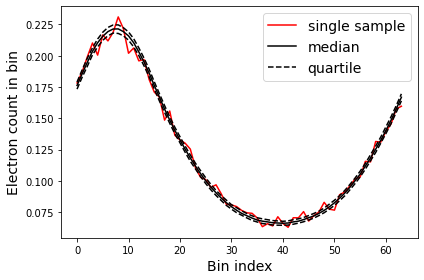

In [3]:
ds = np.loadtxt('/Users/kuz/Documents/Research/Diamond/Data/diamond_minor_samples.txt')

nsamples,nbins = ds.shape
print(ds.shape)
# sum over all bins is the electron count 
#  (8 for 2 atom diamond primitive cell)
nelec = ds.sum(axis=1)
print('nelec',nelec.min(),nelec.max())

# median and interquartile range
dq = np.quantile(ds,[.25,.5,.75],axis=0)

plt.figure(tight_layout=True)
ind = np.arange(nbins)
plt.plot(ind,ds[0],'r-' ,label='single sample')
plt.plot(ind,dq[1],'k-' ,label='median')
plt.plot(ind,dq[0],'k--',label='quartile')
plt.plot(ind,dq[2],'k--')
plt.xlabel('Bin index',fontsize=14)
plt.ylabel('Electron count in bin',fontsize=14)
plt.legend(fontsize=14)

plt.show()

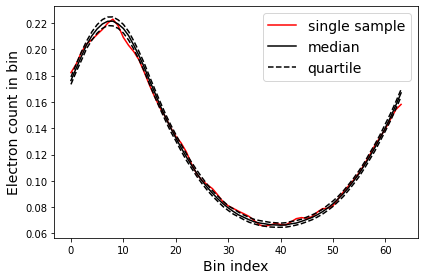

In [4]:
# Test using gaussian filtering
from scipy.ndimage import gaussian_filter
gf = gaussian_filter(ds[0], sigma=1)
plt.figure(tight_layout=True)
ind = np.arange(nbins)
plt.plot(ind,gf,'r-' ,label='single sample')
plt.plot(ind,dq[1],'k-' ,label='median')
plt.plot(ind,dq[0],'k--',label='quartile')
plt.plot(ind,dq[2],'k--')
plt.xlabel('Bin index',fontsize=14)
plt.ylabel('Electron count in bin',fontsize=14)
plt.legend(fontsize=14)

plt.show()

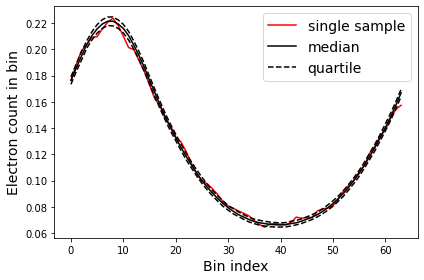

In [5]:
# Test using wiener filtering
from scipy.signal import wiener

wf = wiener(ds[0])  #Filter the image

plt.figure(tight_layout=True)
ind = np.arange(nbins)
plt.plot(ind,wf,'r-' ,label='single sample')
plt.plot(ind,dq[1],'k-' ,label='median')
plt.plot(ind,dq[0],'k--',label='quartile')
plt.plot(ind,dq[2],'k--')
plt.xlabel('Bin index',fontsize=14)
plt.ylabel('Electron count in bin',fontsize=14)
plt.legend(fontsize=14)

plt.show()

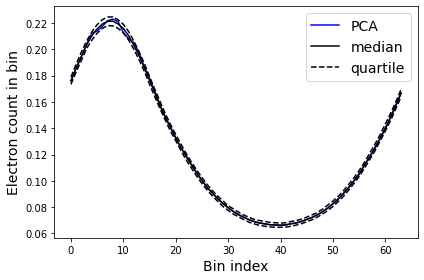

In [6]:
# Test using PCA filtering
from sklearn.decomposition import PCA
n_components = 5 
pca = PCA(n_components=n_components)
scores = pca.fit_transform(ds)  
reconstructed = pca.inverse_transform(scores)
pcf = reconstructed[0] 

plt.figure(tight_layout=True)
plt.plot(ind, pcf,    'b-',  label='PCA')
plt.plot(ind,dq[1],'k-' ,label='median')
plt.plot(ind,dq[0],'k--',label='quartile')
plt.plot(ind,dq[2],'k--')
plt.xlabel('Bin index',fontsize=14)
plt.ylabel('Electron count in bin',fontsize=14)
plt.legend(fontsize=14)

plt.show()

In [8]:
with h5py.File('/Users/kuz/Documents/Research/Diamond/Data/density_tot_ref.h5', 'r') as file:
    #print("Keys: %s" % file.keys())
    ref_d = file['density'][:]
#print(ref_d)
print(ref_d.shape)
minorized_ref_d = np.sum(np.sum(ref_d,axis=2),axis=1)
minorized_ref_d.shape



(64, 64, 64)


(64,)

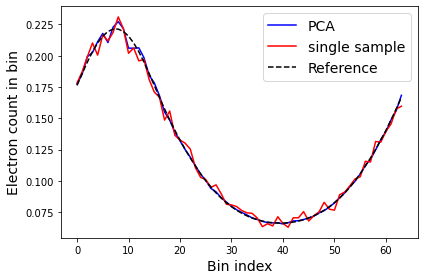

In [9]:
ds = np.loadtxt('/Users/kuz/Documents/Research/Diamond/Data//diamond_minor_samples.txt')
nsamples,nbins = ds.shape
n_components = 5 
pca = PCA(n_components=n_components)
scores = pca.fit_transform(ds)  
reconstructed = pca.inverse_transform(scores)
pcf = reconstructed[0] 
ind = np.arange(nbins)

plt.figure(tight_layout=True)
plt.plot(ind, pcf,    'b-',  label='PCA')
plt.plot(ind,ds[0],'r-' ,label='single sample')
plt.plot(ind,minorized_ref_d,'k--',label='Reference')
plt.xlabel('Bin index',fontsize=14)
plt.ylabel('Electron count in bin',fontsize=14)
plt.legend(fontsize=14)

plt.show()

In [10]:
from scipy.stats import entropy
def jensen_shannon_divergence(P, Q):

    m = (P + Q) / 2
    return (entropy(P, m, base=2) + entropy(Q, m, base=2)) / 2
print("PCA JS-Div Loss",jensen_shannon_divergence(pcf, minorized_ref_d))
print("Median Sample JS-Div Loss",jensen_shannon_divergence(dq[1], minorized_ref_d))

PCA JS-Div Loss 3.5106027821822034e-05
Median Sample JS-Div Loss 2.220664940352565e-07
